# importando bibliotecas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inicializando dataset


In [12]:
datos = pd.read_csv("assets/data/games.csv", index_col="Id") # el pd (pandas) y luego con un read_csv("aquí la ruta") luego un , index_col="id"
datos.head() # un Head para poder mostrar dentro del (espeifico el número que quiero ver/ el default es 5) 

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


#### Dimension del dataset

In [13]:
print(f"La dimension del data set es: {datos.shape}")

La dimension del data set es: (1512, 13)


### info nos sirve siempre que queramos ver la informacion de los .csv

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


### Tambien con un .isnull().any() simplificamos mejor para analizar la información

In [15]:
datos.isnull().any()

Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

## Mostrando las filas en especifico con datos null
### con un axis=1 => 0 es eje(x) (Filas) y 1 es eje(y) (columnas)

##### axis=0: Aplica la operación a lo largo de las filas (por columna). Este es el valor predeterminado.
##### axis=1: Aplica la operación a lo largo de las columnas (por fila).

In [16]:
filas_nulas = datos[datos.isnull().any(axis=1)]
print(filas_nulas)

                                                  Title     Release Date  \
Id                                                                         
587                                   Final Fantasy XVI     Jun 22, 2023   
649                                   Death Stranding 2  releases on TBD   
713                           Final Fantasy VII Rebirth     Dec 31, 2023   
719                                           Lies of P     Aug 01, 2023   
726                                               Judas     Mar 31, 2025   
746   Like a Dragon Gaiden: The Man Who Erased His Name     Dec 31, 2023   
972           The Legend of Zelda: Tears of the Kingdom     May 12, 2023   
1130                           Star Wars Jedi: Survivor     Apr 28, 2023   
1160            We Love Katamari Reroll + Royal Reverie     Jun 02, 2023   
1202                                         Earthblade     Dec 31, 2024   
1245                               NEET Girl Date Night     Oct 21, 2022   
1305        

## .dropna() nos sirve para eliminar aquellos que tengan un dato naN

In [17]:
data_sin_nulos = datos.dropna() # elimina filas o columnas que contengan datos con valores naN
data_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1498 non-null   object 
 1   Release Date       1498 non-null   object 
 2   Team               1498 non-null   object 
 3   Rating             1498 non-null   float64
 4   Times Listed       1498 non-null   object 
 5   Number of Reviews  1498 non-null   object 
 6   Genres             1498 non-null   object 
 7   Summary            1498 non-null   object 
 8   Reviews            1498 non-null   object 
 9   Plays              1498 non-null   object 
 10  Playing            1498 non-null   object 
 11  Backlogs           1498 non-null   object 
 12  Wishlist           1498 non-null   object 
dtypes: float64(1), object(12)
memory usage: 163.8+ KB


### verificar si el genero rpg esta presente en el dataset


In [18]:
# creo una funcion la cual me retornara RPG en genres (generos)
def filtro_rpg(genres):
    return 'RPG' in genres

# Se aplica el filtro utilizando un apply
datosRPG = data_sin_nulos[data_sin_nulos['Genres'].apply(filtro_rpg)] # el . apply es para que se añada a datosRPG y el (filtro_rpg) es para que se haga la función

In [19]:
datosRPG.head(8) # muestro los primero 8 datos que cumplen con el "RPG"

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K
10,Persona 5 Royal,"Oct 31, 2019","['Atlus USA', 'Atlus']",4.4,2.7K,2.7K,"['Adventure', 'RPG', 'Turn Based Strategy']",An enhanced version of Persona 5 with some new...,"['Verdadeiro goty 2017, zelda é o caralho. Vai...",12K,2.3K,5.1K,3K
12,God of War,"Apr 20, 2018","['Sony Interactive Entertainment', 'SIE Santa ...",4.2,2.9K,2.9K,"['Adventure', 'Brawler', 'RPG']",God of War is the sequel to God of War III as ...,"['freya te vejo como figura materna', 'i ruv !...",21K,1.1K,4.8K,2.6K


# transformacion en solo 2 columnas

In [20]:
nombresRPG = datosRPG[['Title','Rating']] # con dos corchetes y dentro de ellos separados por comas van los especifícadores
nombresRPG.head(10) # ver los primeros 10

,Title,Rating
Id,,
0,Elden Ring,4.5
1,Hades,4.3
2,The Legend of Zelda: Breath of the Wild,4.4
3,Undertale,4.2
6,Omori,4.2
9,NieR: Automata,4.3
10,Persona 5 Royal,4.4
12,God of War,4.2
14,Bloodborne,4.5


# AGREGANDO LAS ETIQUETAS DE DATOS AL GRÁFICPO

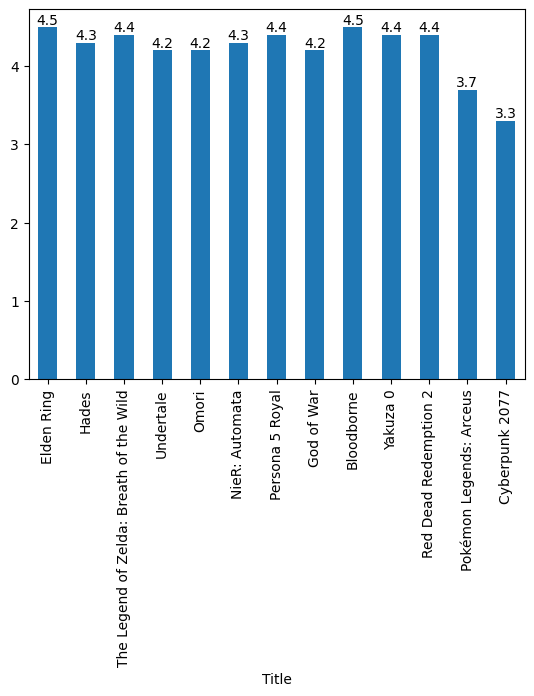

In [21]:
datasetRPG = nombresRPG.head(13)
datasetRPG.set_index('Title', inplace=True) # inplace Modifíca el DataFrame datasetRPG, osea "en cada" uno de ellos, agrega el titulo y de así no tengo que crear una nueva Var

grafico = datasetRPG['Rating'].plot(kind='bar')

# Agregando etiquetasde Rating en las barras
for i, rating in enumerate(datasetRPG['Rating']):
    grafico.annotate(str(rating), xy=(i,rating), ha='center', va='bottom')
plt.show()

### Promedio ratings videojuegos RPG

In [27]:
# Las funciones lambda se aplican a cada elemento de la columna Genres
# esta funcion comprueba si la cadena "RPG" está presente en el valor de cada fila (Resultado serie de booleanos)

ratings_RPG = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'RPG' in x)]['Rating']
promedio_RPG = ratings_RPG.mean()

promedio_RPG

3.8325581395348833

### Promedio ratings videojuegos Indie

In [29]:
ratings_Indie = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'Indie' in x)]['Rating']
promedio_indie = ratings_Indie.mean()

promedio_indie

3.7031802120141344

### Creacion de un nuevo dataframe

In [31]:
#La función DataFrame crea un nuevo DataFrame vacío o a partir de datos existentes
#Recibe un diccionario, especificando las etiquetas de las columnas (claves) y sus valores respectivos

dataset_promedios = pd.DataFrame({'Genero':['RPG', 'Indie'], 'Promedio':[promedio_RPG,promedio_indie]})

## Creacion de gráfico circular

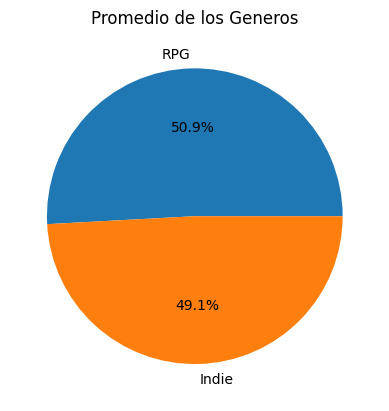

In [38]:
# plt.pie / genera un grafico circular
# autopct: es una cadena de formato que especifica cómo se mostrarán los porcentajes en el gráfico circular
plt.pie(dataset_promedios['Promedio'], labels=dataset_promedios['Genero'],autopct='%1.1f%%')
plt.title('Promedio de los Generos')
plt.show()